In [13]:
from __future__ import print_function
import os
import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle
from Helpers.cnn_predictor import *
import pylab

# Config the matlotlib backend as plotting inline in IPython
%matplotlib inline

# for ROC based validation: 
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import *
from sklearn.model_selection import StratifiedKFold

In [2]:
'''Set the constant paths here'''
# set the paths required for the script to work:
root = "../Data/"
pickle_file_path = root + "Data_pindown.pickle"
log_path = root + "logs"
model_path = os.path.join(root, "Models/Model1/")

In [3]:
Formatted_Data = {}
with open(pickle_file_path, "rb") as f:
    Formatted_Data = pickle.load(f)

In [4]:
# recollect the fragmented data

labels_mappings = Formatted_Data['label_mapping']
print(labels_mappings)

train_dataSet = Formatted_Data['train_data']
train_labels  = Formatted_Data['train_labels']

cv_dataSet = Formatted_Data['cv_data']
cv_labels = Formatted_Data['cv_labels']

test_dataSet = Formatted_Data['test_data']
test_labels  = Formatted_Data['test_labels']

print(train_dataSet.shape, cv_dataSet.shape, test_dataSet.shape)
print(train_labels.shape, cv_labels.shape, test_labels.shape)

{'Action-Painting': 0, 'Colour-Field-Painting': 1, 'Surreal-Surrealism': 8, 'art--Expressionism': 9, 'Op-Art': 6, 'Hard-Edge-Art': 3, 'ORPHISM': 5, 'Post-impressionism': 7, 'Minimalism-Art': 4, 'Cubism': 2}
(1927, 100, 100, 3) (276, 100, 100, 3) (551, 100, 100, 3)
(1927, 10) (276, 10) (551, 10)


In [5]:
reverse_labels_mappings = dict([(labels_mappings[k], k) for k in labels_mappings.keys()])
reverse_labels_mappings

{0: 'Action-Painting',
 1: 'Colour-Field-Painting',
 2: 'Cubism',
 3: 'Hard-Edge-Art',
 4: 'Minimalism-Art',
 5: 'ORPHISM',
 6: 'Op-Art',
 7: 'Post-impressionism',
 8: 'Surreal-Surrealism',
 9: 'art--Expressionism'}

In [6]:
full_dataSet = np.vstack((train_dataSet, cv_dataSet, test_dataSet))
full_labels  = np.vstack((train_labels, cv_labels, test_labels))

print(full_dataSet.shape, full_labels.shape)

(2754, 100, 100, 3) (2754, 10)


In [9]:
predictions = np.ndarray([100, 10])
i = 0
for data in full_dataSet[:100]:
    prediction = get_direct_predictions(data)
    predictions[i, :] = prediction[0]
    i += 1
    
predictions[:3]

array([[ 0.13821478,  0.09066813,  0.06685933,  0.06912044,  0.17950606,
         0.06677902,  0.17408656,  0.06713723,  0.08084058,  0.06678777],
       [ 0.12872234,  0.08406455,  0.11022352,  0.1457499 ,  0.07772427,
         0.11529482,  0.07781333,  0.0835086 ,  0.07962155,  0.09727716],
       [ 0.06437282,  0.06773624,  0.15409173,  0.06371509,  0.06383355,
         0.06445201,  0.06360506,  0.16698788,  0.16405332,  0.12715229]])

In [10]:
n_classes = predictions.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(full_labels[:100, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

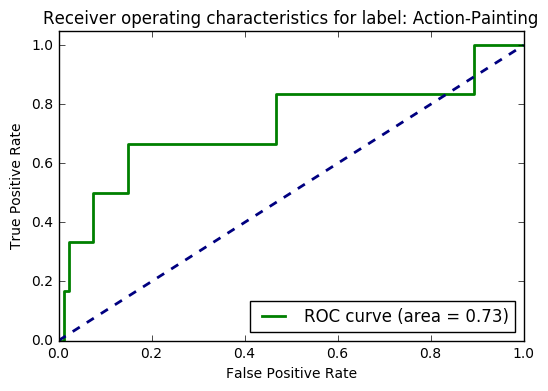

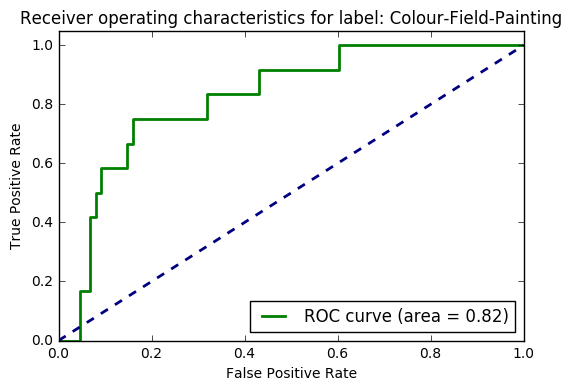

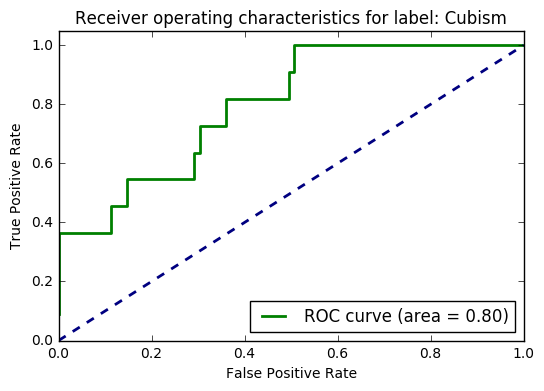

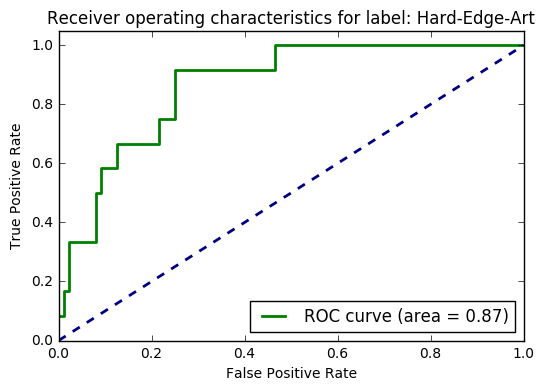

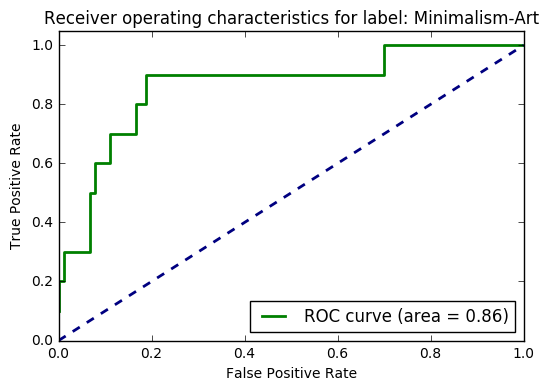

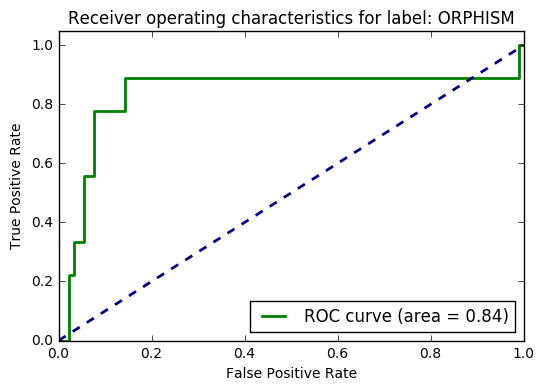

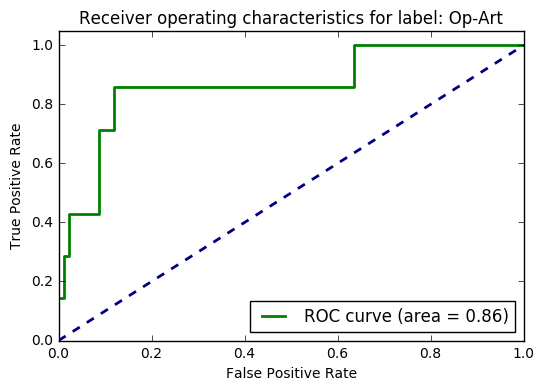

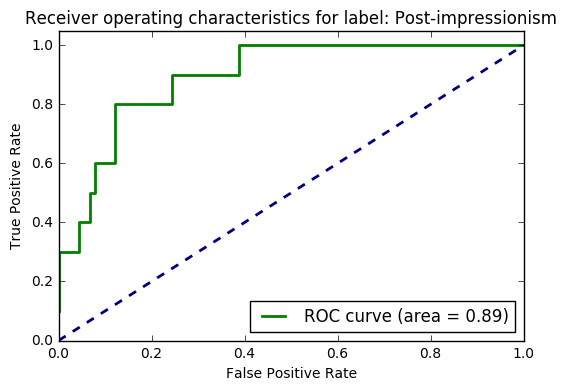

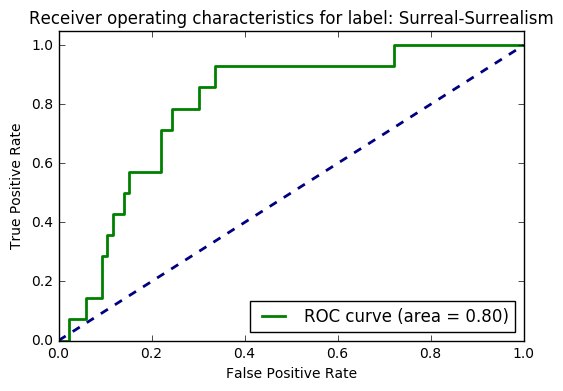

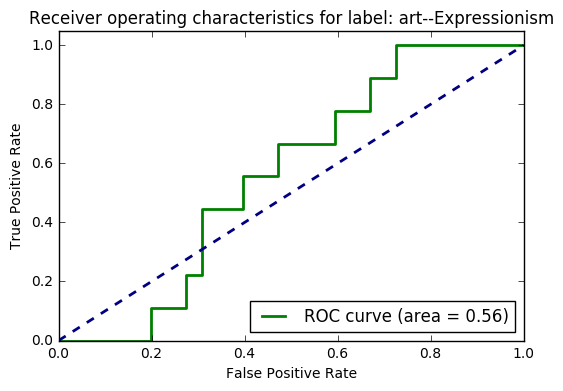

In [18]:
# plot for all the labels

for i in range(n_classes):
    plt.figure()
    lw = 2
    plt.plot(fpr[i], tpr[i], color='green',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristics for label: ' + reverse_labels_mappings[i])
    plt.legend(loc="lower right")
    plt.savefig("ROC_plots/" + reverse_labels_mappings[i] + ".png")
    plt.show()